<a href="https://colab.research.google.com/github/Melikaeydel/GSE256265/blob/main/MSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!apt-get update
!apt-get install -y clustalo


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [14]:
with open("MMP1_sequences.fasta", "w") as f:
    f.write(""">human_MMP1
MHSFPPLLLLVLLFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG
>mouse_MMP1
MKSSPLLLLILFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG
>rat_MMP1
MKSSPLLLLILFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG
>chimpanzee_MMP1
MHSFPPLLLLVLLFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG
""")


In [15]:
!clustalo -i MMP1_sequences.fasta -o MMP1_aligned.fasta --force


In [17]:
!pip install biopython


In [18]:
from Bio import AlignIO

alignment = AlignIO.read("MMP1_aligned.fasta", "fasta")

print("تعداد توالی‌ها:", len(alignment))
print("طول alignment:", alignment.get_alignment_length())

# نمایش چند تا توالی اولیه:
for record in alignment[:3]:
    print(f">{record.id}")
    print(record.seq)

# تحلیل موقعیت‌های محافظت‌شده (همه‌ی توالی‌ها یکسان در آن ستون)
print("\nموقعیت‌های محافظت‌شده:")
for i in range(alignment.get_alignment_length()):
    column = alignment[:, i]
    if len(set(column)) == 1:
        print(f"موقعیت {i+1}: {column[0]}")


تعداد توالی‌ها: 4
طول alignment: 105
>human_MMP1
MHSFPPLLLLVLLFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG
>mouse_MMP1
MKS--SPLLLLILFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG
>rat_MMP1
MKS--SPLLLLILFGKTSRRAKLLGAVSPVTRGPPKSPALPQPGIVFVHSLGQGPLVTVTLCGNPKVLRGLQPGSRGVLFFQKTHGKRYTTFYLSPSQSLWHHTG

موقعیت‌های محافظت‌شده:
موقعیت 1: M
موقعیت 3: S
موقعیت 8: L
موقعیت 9: L
موقعیت 10: L
موقعیت 13: L
موقعیت 14: F
موقعیت 15: G
موقعیت 16: K
موقعیت 17: T
موقعیت 18: S
موقعیت 19: R
موقعیت 20: R
موقعیت 21: A
موقعیت 22: K
موقعیت 23: L
موقعیت 24: L
موقعیت 25: G
موقعیت 26: A
موقعیت 27: V
موقعیت 28: S
موقعیت 29: P
موقعیت 30: V
موقعیت 31: T
موقعیت 32: R
موقعیت 33: G
موقعیت 34: P
موقعیت 35: P
موقعیت 36: K
موقعیت 37: S
موقعیت 38: P
موقعیت 39: A
موقعیت 40: L
موقعیت 41: P
موقعیت 42: Q
موقعیت 43: P
موقعیت 44: G
موقعیت 45: I
موقعیت 46: V
موقعیت 47: F
موقعیت 48: V
موقعیت 49: H
موقعیت 50: S
موقعیت 51: L
موقعیت 52: G
موقعیت

In [19]:
!pip install logomaker biopython matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 59.0 MB/s eta 0:00:00


<Figure size 1500x500 with 0 Axes>

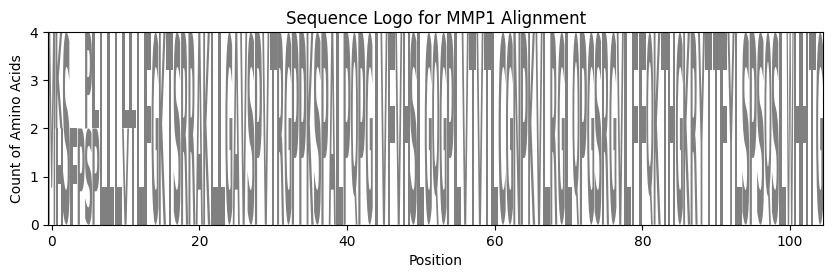

In [20]:
import logomaker
from Bio import AlignIO
import matplotlib.pyplot as plt

# خواندن فایل الاینمنت (فرمت fasta)
alignment = AlignIO.read("MMP1_aligned.fasta", "fasta")

# ساخت یک ماتریس فرکانس هر آمینواسید در هر ستون
counts_matrix = logomaker.alignment_to_matrix([str(rec.seq) for rec in alignment], to_type='counts')

# رسم لوگو
plt.figure(figsize=(15,5))
logo = logomaker.Logo(counts_matrix)
plt.title("Sequence Logo for MMP1 Alignment")
plt.xlabel("Position")
plt.ylabel("Count of Amino Acids")
plt.show()


In [23]:
for i, row in counts_matrix.iterrows():
    if (row > 0).sum() == 1:  # فقط یک آمینواسید در این ستون هست
        aa = row[row > 0].index[0]
        print(f"موقعیت {i+1} کاملاً محافظت شده با آمینواسید: {aa}")


موقعیت 1 کاملاً محافظت شده با آمینواسید: M
موقعیت 2 کاملاً محافظت شده با آمینواسید: H
موقعیت 8 کاملاً محافظت شده با آمینواسید: L
موقعیت 9 کاملاً محافظت شده با آمینواسید: L
موقعیت 10 کاملاً محافظت شده با آمینواسید: L
موقعیت 13 کاملاً محافظت شده با آمینواسید: L
موقعیت 14 کاملاً محافظت شده با آمینواسید: F
موقعیت 15 کاملاً محافظت شده با آمینواسید: G
موقعیت 16 کاملاً محافظت شده با آمینواسید: K
موقعیت 17 کاملاً محافظت شده با آمینواسید: T
موقعیت 18 کاملاً محافظت شده با آمینواسید: S
موقعیت 19 کاملاً محافظت شده با آمینواسید: R
موقعیت 20 کاملاً محافظت شده با آمینواسید: R
موقعیت 21 کاملاً محافظت شده با آمینواسید: A
موقعیت 22 کاملاً محافظت شده با آمینواسید: K
موقعیت 23 کاملاً محافظت شده با آمینواسید: L
موقعیت 24 کاملاً محافظت شده با آمینواسید: L
موقعیت 25 کاملاً محافظت شده با آمینواسید: G
موقعیت 26 کاملاً محافظت شده با آمینواسید: A
موقعیت 27 کاملاً محافظت شده با آمینواسید: V
موقعیت 28 کاملاً محافظت شده با آمینواسید: S
موقعیت 29 کاملاً محافظت شده با آمینواسید: P
موقعیت 30 کاملاً محافظت شده با آمینو